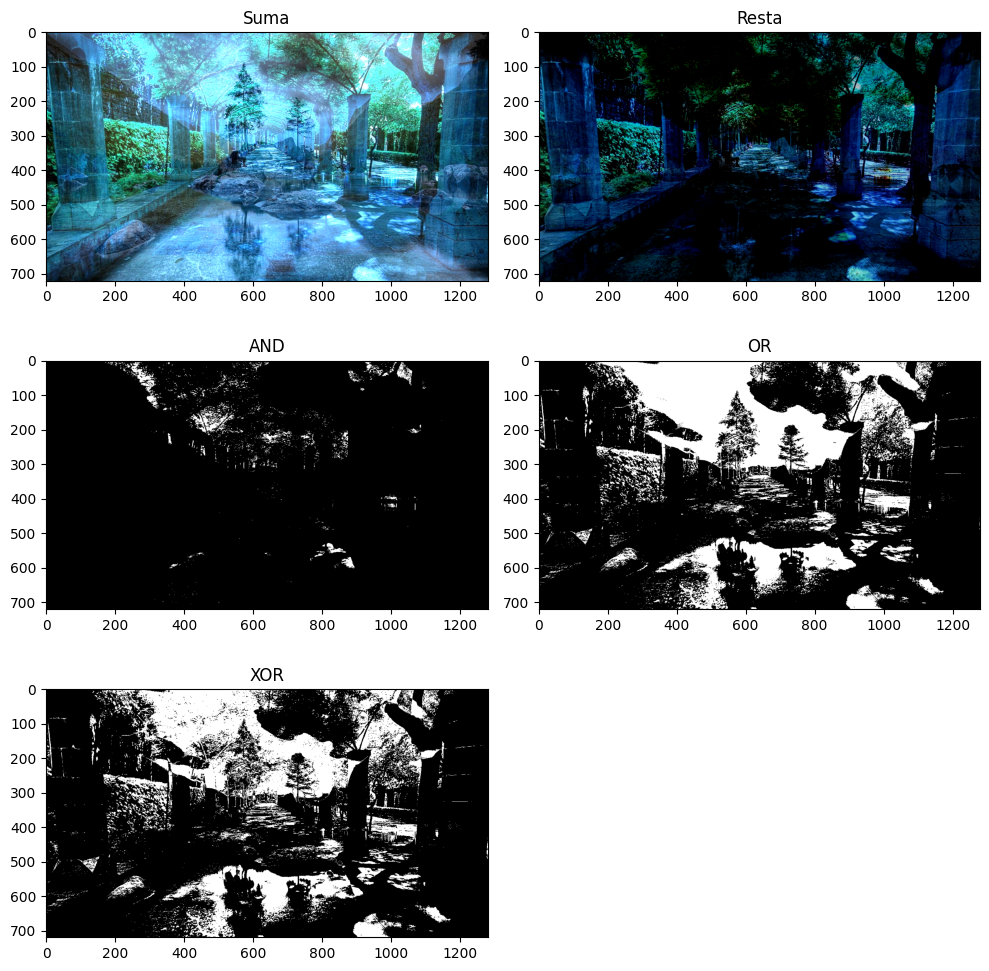

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 


def operaciones_imagenes(ruta_imagen1, ruta_imagen2, umbral=127):
    """
    Realiza operaciones entre dos imágenes: SUMA, RESTA, AND, OR, XOR.

    Parámetros:
    - ruta_imagen1 (str): Ruta de la primera imagen.
    - ruta_imagen2 (str): Ruta de la segunda imagen.
    - umbral (int): Valor de umbral para la binarización.

    Retorna:
    - Un diccionario con las imágenes resultantes de cada operación.
    """

    # Leer las imágenes a color
    imagen1 = cv2.imread(ruta_imagen1)
    imagen2 = cv2.imread(ruta_imagen2)

    # Asegurar que ambas imágenes tengan el mismo tamaño
    if imagen1.shape != imagen2.shape:
        raise ValueError("Las imágenes deben tener el mismo tamaño y número de canales.")

    # Operaciones aritméticas
    suma = cv2.add(imagen1, imagen2)
    resta = cv2.subtract(imagen1, imagen2)

    # Convertir imágenes a escala de grises
    gris1 = cv2.cvtColor(imagen1, cv2.COLOR_BGR2GRAY)
    gris2 = cv2.cvtColor(imagen2, cv2.COLOR_BGR2GRAY)

    # Binarizar imágenes
    bin1 = np.where(gris1 > umbral, 255, 0).astype(np.uint8)
    bin2 = np.where(gris2 > umbral, 255, 0).astype(np.uint8)

    # Operaciones lógicas
    and_op = cv2.bitwise_and(bin1, bin2)
    or_op = cv2.bitwise_or(bin1, bin2)
    xor_op = cv2.bitwise_xor(bin1, bin2)

    return {
        "suma": suma,
        "resta": resta,
        "AND": and_op,
        "OR": or_op,
        "XOR": xor_op
    }

# Ejemplo de uso
ruta1 = '../imagenes/im1.jpg'
ruta2 = '../imagenes/im2.jpg'
resultados = operaciones_imagenes(ruta1, ruta2)

# Visualizar los resultados con matplotlib
plt.figure(figsize=(10, 10))

plt.subplot(3, 2, 1)
plt.imshow(resultados["suma"])
plt.title("Suma")

plt.subplot(3, 2, 2)
plt.imshow(resultados["resta"])
plt.title("Resta")

plt.subplot(3, 2, 3)
plt.imshow(resultados["AND"], cmap='gray')
plt.title("AND")

plt.subplot(3, 2, 4)
plt.imshow(resultados["OR"], cmap='gray')
plt.title("OR")

plt.subplot(3, 2, 5)
plt.imshow(resultados["XOR"], cmap='gray')
plt.title("XOR")

plt.tight_layout()
plt.show()